# CoMoMo analysis

Analysis with KF of the CoMoMo CCAA data

Version: 16/07/2020

Author : JAH, JJGC

In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = 8, 6
plt.rcParams["font.size"     ] = 12

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Thu Jul 16 16:19:08 2020


In [8]:
import numpy as np
import pandas as pd
import matplotlib

In [30]:
import c19.data_functions_momo as momodata
#import c19.momo_analysis       as c19ma

import c19.useir            as us
import c19.useir_plot       as usp
#import c19.kfilter          as kf
#import c19.ana_useir        as aus

import scipy          as sp
import scipy.stats    as stats
#import scipy.optimize as optimize

#from numpy.linalg import inv
#m_   = np.matmul
npa  = np.array

## Data

### Load Data

In [10]:
path = '/Users/hernando/investigacion/bio/c19/cdata/'
dfv, dfe, dfc = momodata.comomo_from_csv(path=path)

In [11]:
dfv.head()

,Andalucia,Date,Aragon,Asturias,Baleares,Canarias,Cantabria,Castilla La Mancha,Castilla y Leon,Cataluna,C. Valenciana,Extremadura,Galicia,Madrid,Melilla,Murcia,Navarra,Pais Vasco,La Rioja
0,0.0,2020-03-05,0.0,0.0,2.0,0.0,0.5,13.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,0.0,1.0,0.0
1,1.5,2020-03-06,1.0,0.0,2.5,0.0,0.0,3.0,0.0,0.0,13.0,0.0,0.0,12.0,0.0,0.0,1.0,0.0,0.0
2,0.0,2020-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,1.5,9.0,0.0,2.5,0.0,1.5,6.0
3,0.0,2020-03-08,1.0,0.0,4.5,0.0,2.0,0.5,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,4.5,4.0,0.0
4,0.0,2020-03-09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,8.0,0.0,0.0,0.0,16.0,2.0


In [12]:
def ca_cases(caname):
    dates  = dfv.Date.values
    cases  = dfv[caname].values
    ucases = dfe[caname].values
    return dates, cases, ucases

## KF smoothing


We compute the KF with smooting considering a random error between days of $q0 = 2 \times 10^{-5}$

We consider the comomo data (deaths from MoMo unless the CoVid death data is more precise)

Me translate the dates by $t_i + t_m$, with $t_i \sim 5, t_m \sim 10$. 

The pandemic peak should be around 15 March 2020

In [125]:
ti, tr, tm  = 4.76, 2.9, 10.
times       = (ti, tr, tm)
q0          = 2e-5
#dates_blind = ('2020-03-25', '2020-04-05')
dates_blind = ('2020-07-01', '2020-08-01')


canames = ['Madrid', 'Castilla y Leon', 'Castilla La Mancha',
           'Cataluna', 'C. Valenciana', 'Aragon',
           'Pais Vasco', 'Navarra', 'La Rioja',
           'Cantabria', 'Asturias', 'Galicia',
           'Murcia', 'Andalucia', 'Extremadura',
           'Canarias', 'Baleares']

def plt_kfs_comomo_ca(caname = 'Madrid', times = times, 
                      dates_blind = dates_blind, q0 = q0, ncols = 3):

    if (not usp.has_figure()):
        plt.figure(figsize = (6, 5))
    dates, cases, ucases = ca_cases(caname)
    ti, tm           = int(times[0]), int(times[-1])
    d0               = np.timedelta64(tm + ti, 'D')
    rs1, rs2 = us.useir_kfs_comomo(dates, cases, ucases, times, 
                                dates_blind = dates_blind, q0 = q0)
    plt.errorbar(dates - d0, cases, yerr = ucases, 
                 ls = '', marker = 'o', color = 'black', ms = 6);
    usp.formatter(plt.gca()); plt.title(caname); plt.ylabel('cases')
    ax2 = plt.gca().twinx()
    ax2.errorbar(dates - d0, rs1[0], yerr = rs1[1], 
                 ls = '--', marker = 'o', ms = 4, label = r'$R$')
    ax2.grid(which = 'both'); plt.legend(); ax2.set_ylabel(r'$R$')
    plt.ylim((0., 8.));
    
def plt_kfs_comomo_ccaa(canames = canames, times = times, 
                        dates_blind = dates_blind, q0 = 1e-4, ncols = 3):

    nrows = int(len(canames)/ncols)
    if (len(canames)%ncols > 0): nrows += 1
    plt.figure(figsize = (ncols * 6, nrows * 5))

    for i, caname in enumerate(canames):
        ax = plt.subplot(nrows, ncols, i + 1, axisbelow = True)
        plt_kfs_comomo_ca(caname, times, dates_blind, q0)        
    plt.tight_layout()

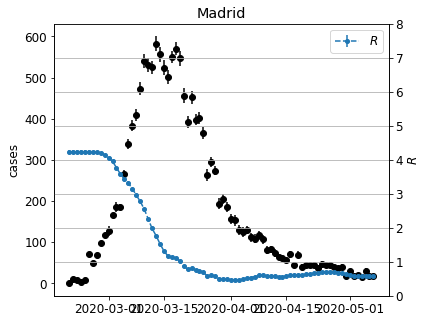

In [126]:
plt_kfs_comomo_ca('Madrid')

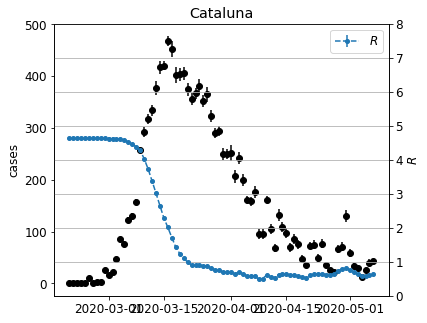

In [127]:
plt_kfs_comomo_ca('Cataluna')

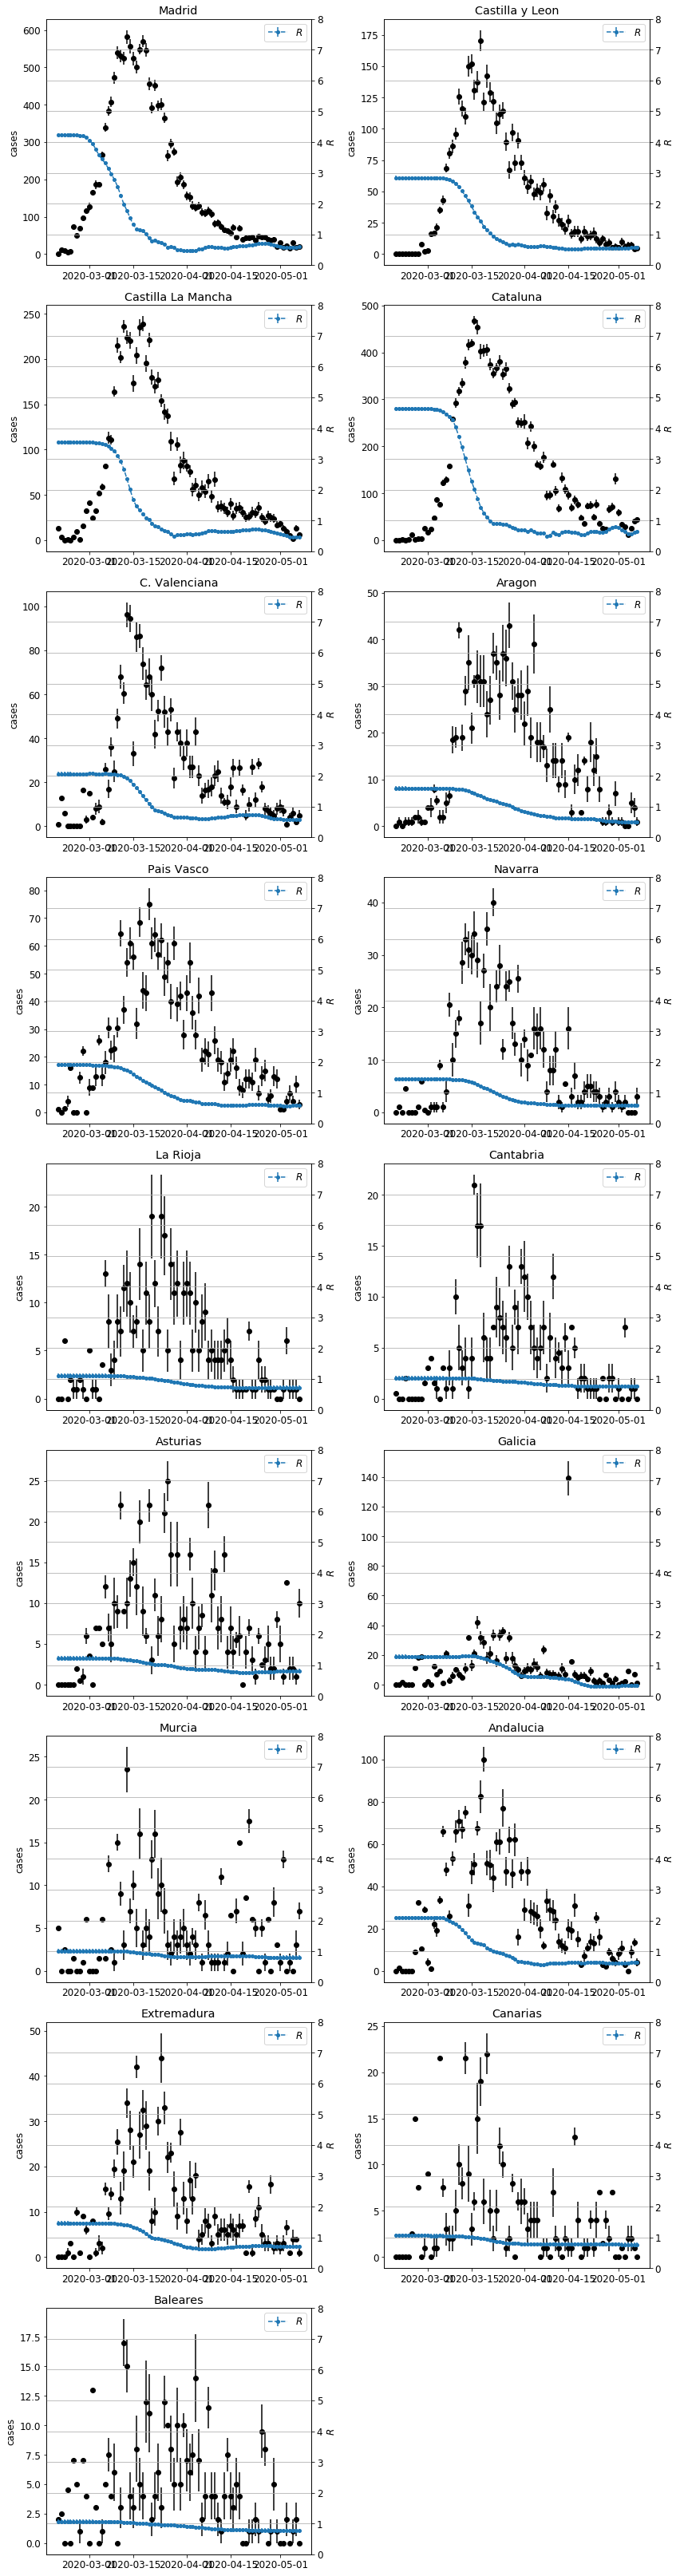

In [128]:
plt_kfs_comomo_ccaa(q0 = 2e-5, ncols = 2);